# **Facial Emotions Recognition**

 We will work with two distinct datasets, both featuring grayscale images of human faces.


*  The *first dataset* comprises 48x48 pixel images categorized into 2 classes :
 1-Satisified  
 2-Unsatisfied
These images are divided into separate training and test sets, containing 28,709 and 3,589 images, respectively, all saved in jpg format.
*   The *second dataset* there are 5,558 images of human faces or sketches, uniformly sized at 224 x 224 pixels categorized into 2 classes :
 1-Satisified  
 2-Unsatisfied
These images are stored in PNG format.

Both datasets have been sourced from Kaggle and will be employed for the purpose of evaluating customer satisfaction.



# Group#1

Latifah Allaboun

Danah Alotaibi   

Sarah Alshehri   

Afnan Alotay     



```
# This is formatted as code
```



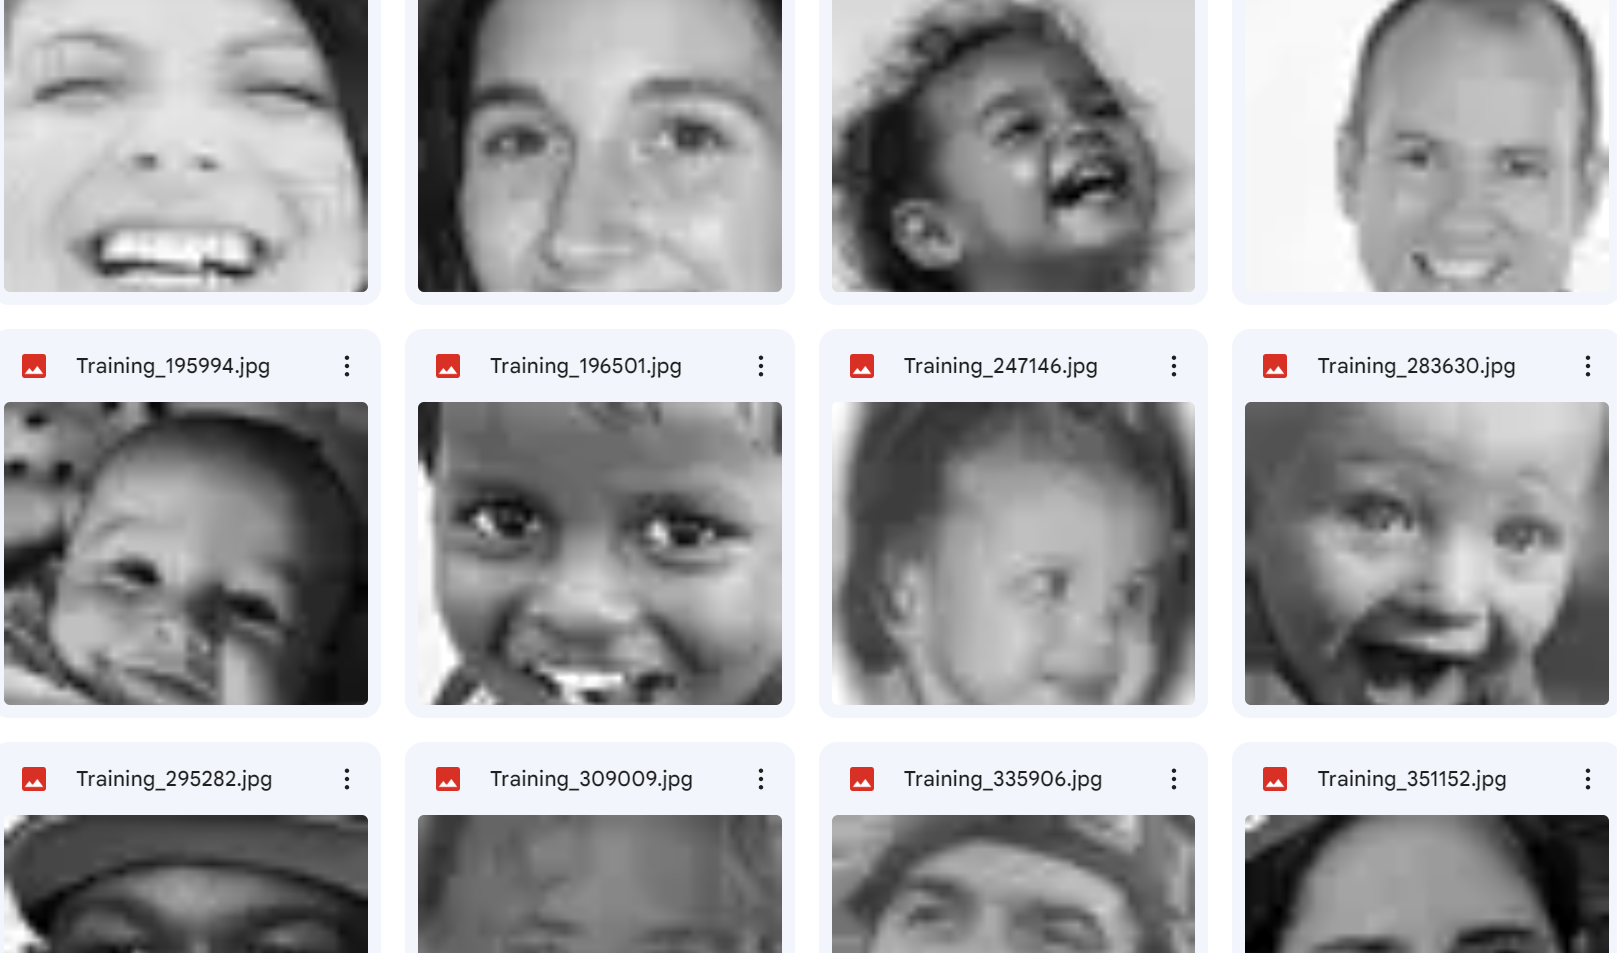

In [ ]:
!pip install deepface
!pip install opencv-python
!pip install matplotlib
!pip install urllib3
!pip install dlib
!pip install scikit-learn
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=314a75d46fc18cbedbb4995ded71ab511a3648f840853bee365a2eb132cd1dd9
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
# import the necessary packages
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as urlreq
import pandas as pd
import dlib
import csv

# opencv 4.1.2 to read images
import cv2

# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams



Mounted at /content/drive


# **Feature Extraction**
We will Predict facial landmarks Using dlip predictor then Extract landmarks
calculate the following features:
1-Mouth open ratio
2-Mouth wide ratio
3-Eye open ratio
4-Eyebrow ratio

The csv file will look like :

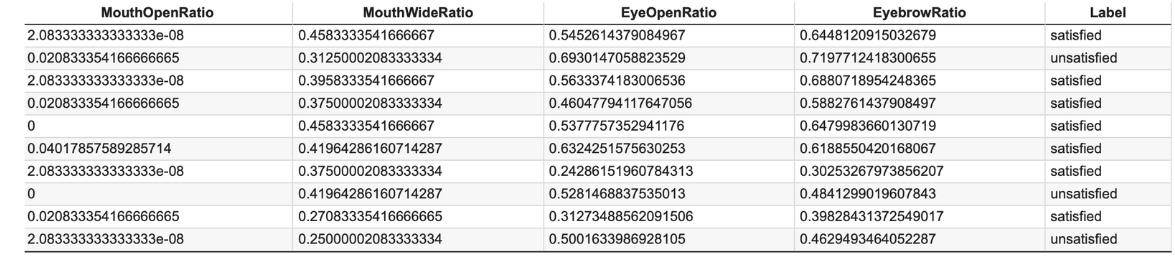


In [ ]:
#Feature Extraction

# Define the path to your image folders
image_folder = "/content/drive/MyDrive/ML-project/images"

# Initialize empty lists to store features and labels for the already split dataset
train_features = []
train_labels = []
test_features = []
test_labels = []


# Initialize the facial landmark predictor from dlib
landmark_predictor = dlib.shape_predictor("/content/drive/MyDrive/ML-project/shape_predictor_68_face_landmarks.dat")



def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale (assuming it's already grayscale)
    gray = image

    # Initialize mouth open ratio and mouth wide ratio
    mouth_open_ratio = 0.0
    mouth_wide_ratio = 0.0

    # Predict facial landmarks
    landmarks = landmark_predictor(gray, dlib.rectangle(0, 0, gray.shape[1], gray.shape[0]))

    # Extract mouth landmarks
    top_lip = landmarks.part(50)
    bottom_lip = landmarks.part(52)
    left_corner = landmarks.part(48)
    right_corner = landmarks.part(54)

    # Calculate the vertical distance between the top and bottom lips
    mouth_height = bottom_lip.y - top_lip.y

    # Calculate the mouth open ratio based on mouth height
    mouth_open_ratio = (mouth_height + 1e-6) / gray.shape[0]  # Normalize by image height

    # Calculate the horizontal distance between the outer mouth corners
    mouth_width = right_corner.x - left_corner.x

    # Calculate the mouth wide ratio based on mouth width
    mouth_wide_ratio = (mouth_width + 1e-6) / gray.shape[1]  # Normalize by image width

    # Normalize the ratios to [0, 1] (adjust the scaling factor as needed)
    mouth_open_ratio = max(0, min(mouth_open_ratio, 1.0))
    mouth_wide_ratio = max(0, min(mouth_wide_ratio, 1.0))

    # Calculate eye open ratio (example calculation)
    left_eye_mean = gray[37:41, :].mean()
    right_eye_mean = gray[43:47, :].mean()
    eye_open_ratio = ((left_eye_mean + right_eye_mean) / 2) / 255.0  # Normalize to [0, 1]

    # Calculate eyebrow ratio (example calculation)
    left_eyebrow_mean = gray[21:22, :].mean()
    right_eyebrow_mean = gray[26:27, :].mean()
    eyebrow_ratio = ((left_eyebrow_mean + right_eyebrow_mean) / 2) / 255.0  # Normalize to [0, 1]

    # Return the extracted features as a dictionary
    features = {
        "MouthOpenRatio": mouth_open_ratio,
        "MouthWideRatio": mouth_wide_ratio,
        "EyeOpenRatio": eye_open_ratio,
        "EyebrowRatio": eyebrow_ratio
    }

    return features



# Dataset 1: Already Split (train and test)
train_directory = os.path.join(image_folder, "dataset1", "train")
test_directory = os.path.join(image_folder, "dataset1", "test")

# Load and process the already split dataset
for dataset_folder in [train_directory, test_directory]:
    for label in os.listdir(dataset_folder):
        label_folder = os.path.join(dataset_folder, label)

        for image_file in os.listdir(label_folder):
            image_path = os.path.join(label_folder, image_file)

            # Extract features from the image
            extracted_features = extract_features(image_path)

            if extracted_features is not None:
                if dataset_folder == train_directory:
                    train_features.append(extracted_features)
                    train_labels.append(label)
                else:
                    test_features.append(extracted_features)
                    test_labels.append(label)

# Dataset 2: Not Split
dataset2_directory = os.path.join(image_folder, "dataset2")

# Initialize lists to store features and labels for the second dataset
features2 = []
labels2 = []

# Load and process the second dataset (not split)
for label in os.listdir(dataset2_directory):
    label_folder = os.path.join(dataset2_directory, label)

    for image_file in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_file)

        # Extract features from the image
        extracted_features = extract_features(image_path)

        if extracted_features is not None:
            features2.append(extracted_features)
            labels2.append(label)

# Combine the datasets if needed
combined_features = train_features + features2
combined_labels = train_labels + labels2

# Print the number of combined features and labels
print("Number of combined features:", len(combined_features))
print("Number of combined labels:", len(combined_labels))

# Split the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    combined_features, combined_labels, test_size=0.4, random_state=42)

# Save the extracted features and labels to a CSV file
csv_file_path = 'extracted_features.csv'
fieldnames = ["MouthOpenRatio", "MouthWideRatio" , "EyeOpenRatio", "EyebrowRatio", "Label"]

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Write the feature data for each example
    for features, label in zip(X_train_combined, y_train_combined):
        feature_dict = {fieldnames[i]: features[fieldnames[i]] for i in range(len(fieldnames) - 1)}
        feature_dict["Label"] = label
        writer.writerow(feature_dict)

# Verify that the CSV file has been created in the current directory
print("CSV file saved to:", csv_file_path)

Number of combined features: 19095
Number of combined labels: 19095
CSV file saved to: extracted_features.csv


# SVM model
The first method We employed is the Support Vector Machine (SVM). To evaluate the performance of the SVM model, we will utilize multiple metrics to gain a good understanding of its effectiveness which are :
Accuracy

*   Accuracy
*   Recall
*   Precision
*   F1 Score

For optimizing the SVM model, we intend to employ the **grid search** method. This involves systematically searching through a predefined set of hyperparameter values to identify the combination that yields the best performance.
The key hyperparameters for SVM that we will focus on during the grid search include the choice of kernel : (linear, rbf, poly, sigmoid) and regularization parameter (C) : (0.1, 1, 10)





In [ ]:
#SVM model
# Import necessary libraries
from sklearn.model_selection import GridSearchCV


# Load the extracted features and labels from the CSV file
csv_file_path = 'extracted_features.csv'
data = []
labels = []

with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append([float(row['MouthOpenRatio']),float(row['MouthWideRatio']),float(row['EyeOpenRatio']), float(row['EyebrowRatio'])])
        labels.append(row['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the hyperparameters and their ranges to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and classifier
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Train the best classifier on the training data
best_classifier.fit(X_train, y_train)

# Make predictions on the test data using the best classifier
y_pred = best_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Hyperparameters: {accuracy:.2f}")

# Print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 0.1, 'kernel': 'rbf'}
Accuracy with Best Hyperparameters: 0.70
              precision    recall  f1-score   support

   satisfied       0.70      0.59      0.64      1051
 unsatisfied       0.69      0.79      0.74      1241

    accuracy                           0.70      2292
   macro avg       0.70      0.69      0.69      2292
weighted avg       0.70      0.70      0.69      2292



In [ ]:

#SNN model

# Load the extracted features and labels from the CSV file
csv_file_path = 'extracted_features.csv'
data = []
labels = []

with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append([float(row['MouthOpenRatio']), float(row['MouthWideRatio']), float(row['EyeOpenRatio']), float(row['EyebrowRatio'])])
        labels.append(row['Label'])

# Encode the class labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build a Simple Neural Network (SNN) model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),           # Input layer with 4 features
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit (binary classification) and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=32)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Make predictions on the test data
y_pred = (model.predict(np.array(X_test)) > 0.5).astype("int32")

# Print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Epoch 1/10
287/287 [==============================] - 2s 3ms/step - loss: 0.6693 - accuracy: 0.5963
Epoch 2/10
287/287 [==============================] - 1s 3ms/step - loss: 0.6192 - accuracy: 0.6615
Epoch 3/10
287/287 [==============================] - 1s 3ms/step - loss: 0.6087 - accuracy: 0.6735
Epoch 4/10
287/287 [==============================] - 1s 3ms/step - loss: 0.6048 - accuracy: 0.6789
Epoch 5/10
287/287 [==============================] - 1s 2ms/step - loss: 0.6041 - accuracy: 0.6767
Epoch 6/10
287/287 [==============================] - 1s 2ms/step - loss: 0.6060 - accuracy: 0.6758
Epoch 7/10
287/287 [==============================] - 1s 2ms/step - loss: 0.6037 - accuracy: 0.6788
Epoch 8/10
287/287 [==============================] - 1s 2ms/step - loss: 0.6049 - accuracy: 0.6804
Epoch 9/10
287/287 [==============================] - 1s 2ms/step - loss: 0.6028 - accuracy: 0.6792
Epoch 10/10
72/72 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.6963
T

In [ ]:
#KNN classifier

# Convert the list of dictionaries into a 2D array
X_train_combined_array = np.array([list(features.values()) for features in X_train_combined])
X_test_combined_array = np.array([list(features.values()) for features in X_test_combined])

# Initialize and train the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_train_combined_array, y_train_combined)

# Evaluate the KNN classifier on the test set
accuracy = knn_classifier.score(X_test_combined_array, y_test_combined)
print("Accuracy of KNN classifier:", accuracy)

# Evaluate the KNN classifier on the test set
y_pred = knn_classifier.predict(X_test_combined_array)

# Print the classification report
print(classification_report(y_test_combined, y_pred))



Accuracy of KNN classifier: 0.6630007855459544
              precision    recall  f1-score   support

   satisfied       0.64      0.59      0.61      3436
 unsatisfied       0.68      0.73      0.70      4202

    accuracy                           0.66      7638
   macro avg       0.66      0.66      0.66      7638
weighted avg       0.66      0.66      0.66      7638



In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# No need to convert if X_train_combined and X_test_combined are already NumPy arrays
X_train_combined_array = X_train_combined
X_test_combined_array = X_test_combined


# Ensure that the number of samples in features matches the number of labels
assert len(X_train_combined_array) == len(y_train_combined), "Inconsistent number of samples between features and labels"

# Split the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_train_combined_array, y_train_combined, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  #  the number of trees
    'max_depth': [None, 10, 20, 30],  #  maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # The number of features to consider for the best split
}

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train_combined, y_train_combined)

# Get the best hyperparameters and classifier
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Train the best classifier on the training data
best_classifier.fit(X_train_combined, y_train_combined)

y_pred = best_classifier.predict(X_test_combined)

# Evaluate the model on the test data
accuracy = best_classifier.score(X_test_combined,y_test_combined)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Best Hyperparameters: {accuracy:.2f}")
print(classification_report(y_test_combined, y_pred))




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy with Best Hyperparameters: 0.70
              precision    recall  f1-score   support

   satisfied       0.69      0.65      0.67       851
 unsatisfied       0.71      0.75      0.73       982

    accuracy                           0.70      1833
   macro avg       0.70      0.70      0.70      1833
weighted avg       0.70      0.70      0.70      1833



In [ ]:
#save the model
model_filename = 'random_forest_model.joblib'
joblib.dump(best_classifier, model_filename)

['random_forest_model.joblib']

# Convolutional Neural Network (CNN)
The next method is Convolutional Neural Network (CNN) for image classification using Keras.The code prepares the data by applying augmentation techniques like rescaling, shearing, zooming, and horizontal flipping. Two datasets are utilized: "dataset1" with separate training and testing sets, and "dataset2" without the split.

The CNN model comprises convolutional and pooling layers, followed by dense layers. The model is compiled with Adam optimizer and binary crossentropy loss. Training is on "dataset1" with a validation set, and evaluation is performed on "dataset2".

In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import the necessary packages
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your image folders
image_folder = "/content/drive/MyDrive/ML-project/images"

# Define the image size
img_size = (48, 48)
input_shape = (img_size[0], img_size[1], 1)  # 1 channel for grayscale images

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Dataset 1: Train and Test Split
train_datagen = datagen.flow_from_directory(
    os.path.join(image_folder, "dataset1", "train"),
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_datagen = datagen.flow_from_directory(
    os.path.join(image_folder, "dataset1", "test"),
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Dataset 2: Not Split
dataset2_datagen = datagen.flow_from_directory(
    os.path.join(image_folder, "dataset2"),
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on Dataset 1
history = model.fit(train_datagen, validation_data=test_datagen, epochs=10)

# Evaluate the model on Dataset 2
eval_result = model.evaluate(dataset2_datagen)
print(f"Accuracy on Dataset 2: {eval_result[1] * 100:.2f}%")

# Save the trained model
model.save('image_classification_model.h5')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 16059 images belonging to 2 classes.
Found 4019 images belonging to 2 classes.
Found 3036 images belonging to 2 classes.
Epoch 1/10
502/502 [==============================] - 3661s 7s/step - loss: 0.6289 - accuracy: 0.6482 - val_loss: 0.5816 - val_accuracy: 0.7004
Epoch 2/10
502/502 [==============================] - 90s 180ms/step - loss: 0.5551 - accuracy: 0.7223 - val_loss: 0.5239 - val_accuracy: 0.7450
Epoch 3/10
502/502 [==============================] - 77s 152ms/step - loss: 0.5095 - accuracy: 0.7492 - val_loss: 0.4940 - val_accuracy: 0.7609
Epoch 4/10
502/502 [==============================] - 79s 156ms/step - loss: 0.4725 - accuracy: 0.7661 - val_loss: 0.4760 - val_accuracy: 0.7708
Epoch 5/10
502/502 [==============================] - 86s 172ms/step - loss: 0.4544 - accuracy: 0.7849 - val_loss: 0.4474 - val_accuracy: 0.7888
Epoch 6/10
502/502 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os

# Check the current directory
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")

# List files in the current directory
files_in_current_dir = os.listdir(current_dir)
print(f"Files in Current Directory: {files_in_current_dir}")

import os

model_path = '/content/drive/image_classification_model.h5'

if os.path.exists(model_path):
    print(f"Model file found at: {model_path}")
else:
    print(f"Model file not found at: {model_path}")

Current Directory: /content
Files in Current Directory: ['.config', 'sample_data']
Model file not found at: /content/drive/image_classification_model.h5


# Plotting Learning Curves
In this code we will do line plots that show epochs along the x-axis as time and
the error/accuracy of the model on the y-axis.


In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 10-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

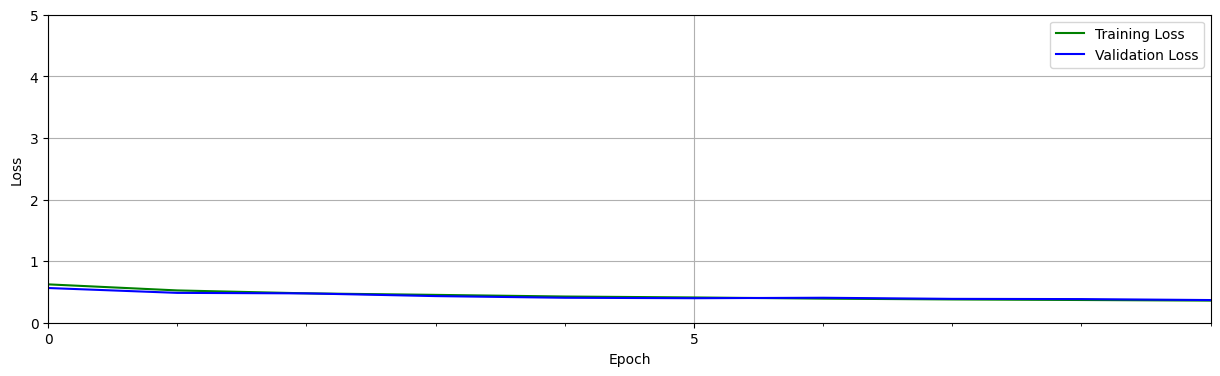

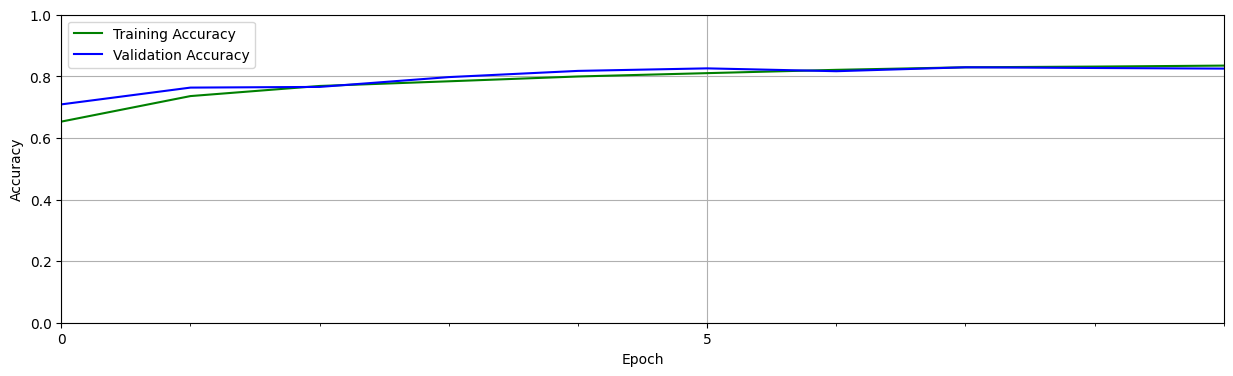

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

# **Adding drop out to the model**

In [ ]:
#CNN with dropout
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your image folders
image_folder = "/content/drive/MyDrive/ML-project/images"

# Define the image size
img_size = (48, 48)
input_shape = (img_size[0], img_size[1], 1)  # 1 channel for grayscale images

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Dataset 1: Train and Test Split
train_datagen = datagen.flow_from_directory(
    os.path.join(image_folder, "dataset1", "train"),
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_datagen = datagen.flow_from_directory(
    os.path.join(image_folder, "dataset1", "test"),
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Dataset 2: Not Split
dataset2_datagen = datagen.flow_from_directory(
    os.path.join(image_folder, "dataset2"),
    target_size=img_size,
    color_mode="grayscale",
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Build the CNN model with Dropout
model_with_dropout = Sequential()
model_with_dropout.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_with_dropout.add(Dropout(0.25))  # Adding dropout layer
model_with_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_with_dropout.add(Flatten())
model_with_dropout.add(Dense(128, activation='relu'))
model_with_dropout.add(Dropout(0.5))  # Adding dropout layer
model_with_dropout.add(Dense(1, activation='sigmoid'))

# Compile the model
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on Dataset 1
history = model_with_dropout.fit(train_datagen, validation_data=test_datagen, epochs=10)

# Evaluate the model on Dataset 2
eval_result = model_with_dropout.evaluate(dataset2_datagen)
print(f"Accuracy on Dataset 2: {eval_result[1] * 100:.2f}%")

# Save the trained model
model_with_dropout.save('image_classification_model_with_dropout.h5')


Found 16059 images belonging to 2 classes.
Found 4019 images belonging to 2 classes.
Found 3036 images belonging to 2 classes.
Epoch 1/10
502/502 [==============================] - 115s 226ms/step - loss: 0.6470 - accuracy: 0.6232 - val_loss: 0.5761 - val_accuracy: 0.7161
Epoch 2/10
502/502 [==============================] - 102s 203ms/step - loss: 0.5507 - accuracy: 0.7205 - val_loss: 0.4994 - val_accuracy: 0.7649
Epoch 3/10
502/502 [==============================] - 105s 209ms/step - loss: 0.5088 - accuracy: 0.7468 - val_loss: 0.4750 - val_accuracy: 0.7716
Epoch 4/10
502/502 [==============================] - 99s 197ms/step - loss: 0.4789 - accuracy: 0.7648 - val_loss: 0.4545 - val_accuracy: 0.7900
Epoch 5/10
502/502 [==============================] - 108s 215ms/step - loss: 0.4632 - accuracy: 0.7812 - val_loss: 0.4254 - val_accuracy: 0.8054
Epoch 6/10
502/502 [==============================] - 102s 204ms/step - loss: 0.4405 - accuracy: 0.7920 - val_loss: 0.4115 - val_accuracy: 0.806

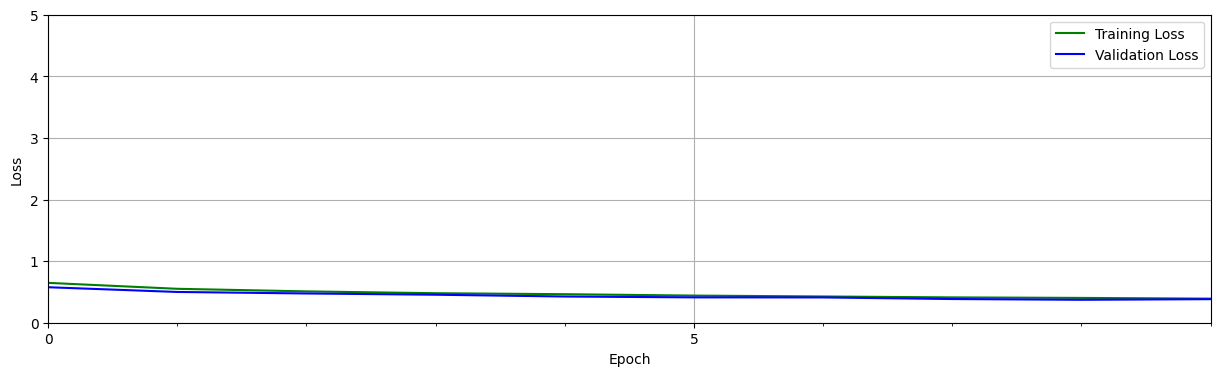

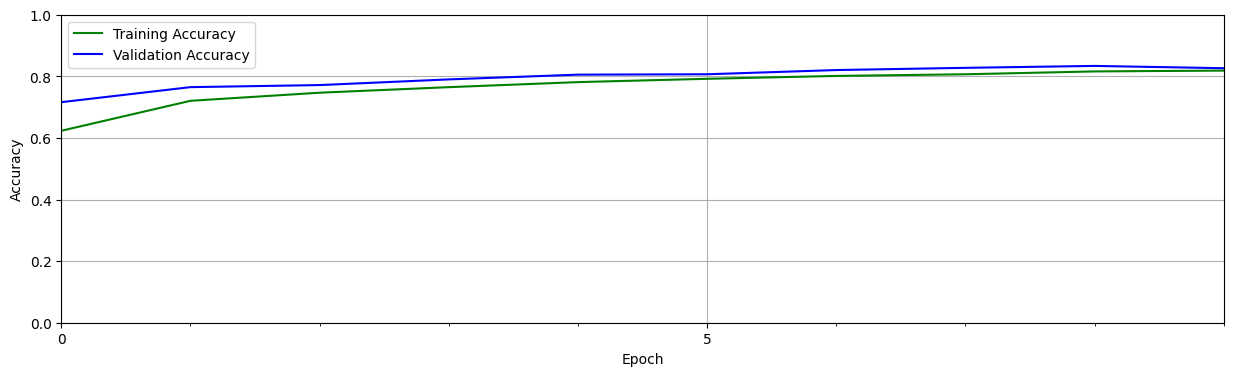

In [ ]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
cpu_info = !lscpu
for inf_item in cpu_info.get_list():
  print(inf_item)

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

# Test the saved models

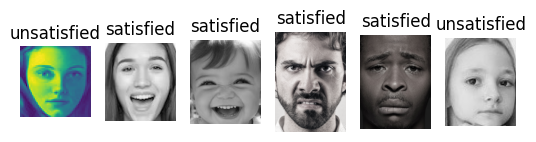

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('/content/drive/MyDrive/ML-project/svm_model.joblib')



try_folder = "/content/drive/MyDrive/ML-project/try"

# Initialize a list to store features for new photos
new_photo_features = []
image_paths = []


for image_file in os.listdir(try_folder):
    image_path = os.path.join(try_folder, image_file)

    # Extract features from the image
    extracted_features = extract_features(image_path)

    if extracted_features is not None:
        new_photo_features.append(extracted_features)
        image_paths.append(image_path)

# Convert the list of dictionaries to a 2D array
new_photo_features_array = np.array([[feature['MouthOpenRatio'], feature['MouthWideRatio'], feature['EyeOpenRatio'], feature['EyebrowRatio']] for feature in new_photo_features])

# Make predictions using the loaded model
predictions = loaded_model.predict(new_photo_features_array)

# Plot photos with predictions
for i, (image_path, prediction) in enumerate(zip(image_paths, predictions)):
    img = mpimg.imread(image_path)

    plt.subplot(1, len(image_paths), i + 1)
    plt.imshow(img)
    plt.title(prediction)
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 37ms/step


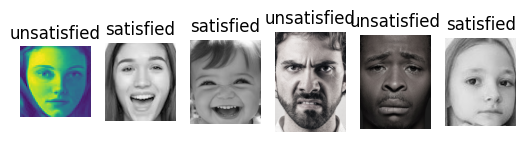

In [ ]:
#CNN
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved CNN model
cnn_model = load_model('/content/drive/MyDrive/ML-project/image_classification_model.h5')

# Assuming 'try' is the folder containing new photos
try_folder = "/content/drive/MyDrive/ML-project/try"

# Initialize lists to store features and image paths for new photos
new_photo_features_cnn = []
image_paths_cnn = []

# Loop through the images in the 'try' folder
for image_file in os.listdir(try_folder):
    image_path = os.path.join(try_folder, image_file)

    # Load and preprocess the image for CNN model input
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))  # Assuming the CNN model expects 48x48 images
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.reshape(img, (1, 48, 48, 1))  # Reshape for model input

    # Predict class probability using the CNN model
    cnn_prediction = cnn_model.predict(img)[0][0]

    new_photo_features_cnn.append(cnn_prediction)
    image_paths_cnn.append(image_path)

# Threshold for determining user satisfaction (adjust as needed)
satisfaction_threshold = 0.5

# Classify user satisfaction based on the CNN predictions
user_satisfaction = ["satisfied" if prediction <= satisfaction_threshold else "unsatisfied" for prediction in new_photo_features_cnn]

# Visualize results
for i, (image_path, prediction) in enumerate(zip(image_paths_cnn, user_satisfaction)):
    img = mpimg.imread(image_path)

    plt.subplot(1, len(image_paths_cnn), i + 1)
    plt.imshow(img)
    plt.title(prediction)
    plt.axis('off')

plt.show()




1/1 [==============================] - 0s 23ms/step


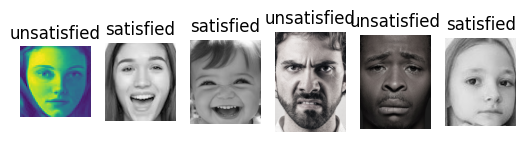

In [ ]:
#CNN
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved CNN model
cnn_model = load_model('/content/drive/MyDrive/ML-project/image_classification_model.h5')

try_folder = "/content/drive/MyDrive/ML-project/try"

# Initialize lists to store predicted labels and image paths for new photos
predicted_labels_cnn = []
image_paths_cnn = []

# Loop through the images in the 'try' folder
for image_file in os.listdir(try_folder):
    image_path = os.path.join(try_folder, image_file)

    # Load and preprocess the image for CNN model input
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))  # Assuming the CNN model expects 48x48 images
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.reshape(img, (1, 48, 48, 1))  # Reshape for model input

    # Predict class label using the CNN model
    predicted_label = "satisfied" if cnn_model.predict(img)[0][0] <= 0.5 else "unsatisfied"

    predicted_labels_cnn.append(predicted_label)
    image_paths_cnn.append(image_path)

# Visualize results
for i, (image_path, predicted_label) in enumerate(zip(image_paths_cnn, predicted_labels_cnn)):
    img = mpimg.imread(image_path)

    plt.subplot(1, len(image_paths_cnn), i + 1)
    plt.imshow(img)
    plt.title(predicted_label)
    plt.axis('off')

plt.show()



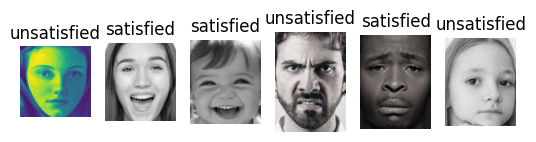

In [ ]:
#Random forest

import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load('/content/drive/MyDrive/ML-project/random_forest_model.joblib')



try_folder = "/content/drive/MyDrive/ML-project/try"

# Initialize a list to store features for new photos
new_photo_features = []
image_paths = []


for image_file in os.listdir(try_folder):
    image_path = os.path.join(try_folder, image_file)

    # Extract features from the image
    extracted_features = extract_features(image_path)

    if extracted_features is not None:
        new_photo_features.append(extracted_features)
        image_paths.append(image_path)

# Convert the list of dictionaries to a 2D array
new_photo_features_array = np.array([[feature['MouthOpenRatio'], feature['MouthWideRatio'], feature['EyeOpenRatio'], feature['EyebrowRatio']] for feature in new_photo_features])

# Make predictions using the loaded model
predictions = loaded_model.predict(new_photo_features_array)

# Plot photos with predictions
for i, (image_path, prediction) in enumerate(zip(image_paths, predictions)):
    img = mpimg.imread(image_path)

    plt.subplot(1, len(image_paths), i + 1)
    plt.imshow(img)
    plt.title(prediction)
    plt.axis('off')

plt.show()